In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from time import sleep
# Import API key
import API_KEY

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
API=API_KEY.API_Key

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['kruisfontein', 'banagher', 'grand gaube', 'mutsamudu', 'san quintin', 'payakumbuh', 'punta arenas', 'carnarvon', 'alice springs', 'taolanaro', 'broome', 'deputatskiy', 'busselton', 'skerries', 'astaneh-ye ashrafiyeh', 'saint-philippe', 'sentyabrskiy', 'rikitea', 'avarua', 'east london', 'kapaa', 'georgetown', 'ifakara', 'tyler', 'esperance', 'avera', 'zhanaozen', 'chokurdakh', 'attawapiskat', 'qaanaaq', 'hobart', 'barentsburg', 'bambous virieux', 'albany', 'mar del plata', 'samandag', 'meulaboh', 'port macquarie', 'khatanga', 'bluff', 'yumen', 'lenki', 'yellowknife', 'dikson', 'arraial do cabo', 'luderitz', 'norman wells', 'millau', 'saint george', 'tiksi', 'hermanus', 'amozoc', 'el wasta', 'atuona', 'naze', 'mayumba', 'san patricio', 'vaini', 'ukiah', 'flinders', 'khandyga', 'beloha', 'ushuaia', 'jamestown', 'saskylakh', 'qaqortoq', 'beira', 'warrnambool', 'nampula', 'yoichi', 'samusu', 'hasaki', 'warqla', 'castro', 'tambacounda', 'cidreira', 'port alfred', 'port lincoln', 'mataura'

In [3]:
url=f"http://api.openweathermap.org/data/2.5/weather?q=todos santos&APPID={API}&units=imperial"
print(url)

http://api.openweathermap.org/data/2.5/weather?q=todos santos&APPID=e63f8f66c81c334e5dedfcb349b3031c&units=imperial


In [4]:
res= requests.get(url)
jres=res.json()
jres

{'coord': {'lon': -110.23, 'lat': 23.45},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 66.2,
  'pressure': 1019,
  'humidity': 82,
  'temp_min': 66.2,
  'temp_max': 66.2},
 'visibility': 19312,
 'wind': {'speed': 14.76, 'deg': 107.504},
 'clouds': {'all': 75},
 'dt': 1546789380,
 'sys': {'type': 1,
  'id': 7165,
  'message': 0.0051,
  'country': 'MX',
  'sunrise': 1546783451,
  'sunset': 1546822205},
 'id': 3981432,
 'name': 'Todos Santos',
 'cod': 200}

In [5]:
50%50

0

In [6]:
Temperature=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Latitude=[]
City_lst=[]
i=0
for city in cities:
    if i%25==0:
        sleep(3)
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={API}&units=imperial"
    print(f"The name of the city is :{city} and the number is:{i}")
    res= requests.get(url)
    jres=res.json()    
    try:
        Humidity.append(jres["main"]["humidity"])
        Cloudiness.append(jres["clouds"]["all"])
        Wind_Speed.append(jres["wind"]["speed"])
        Latitude.append(jres["coord"]["lat"])
        Temperature.append(jres["main"]["temp"])
        City_lst.append(city)
        
    except:
        pass
   
    i+=1 
    

The name of the city is :kruisfontein and the number is:0
The name of the city is :banagher and the number is:1
The name of the city is :grand gaube and the number is:2
The name of the city is :mutsamudu and the number is:3
The name of the city is :san quintin and the number is:4
The name of the city is :payakumbuh and the number is:5
The name of the city is :punta arenas and the number is:6
The name of the city is :carnarvon and the number is:7
The name of the city is :alice springs and the number is:8
The name of the city is :taolanaro and the number is:9
The name of the city is :broome and the number is:10
The name of the city is :deputatskiy and the number is:11
The name of the city is :busselton and the number is:12
The name of the city is :skerries and the number is:13
The name of the city is :astaneh-ye ashrafiyeh and the number is:14
The name of the city is :saint-philippe and the number is:15
The name of the city is :sentyabrskiy and the number is:16
The name of the city is :r

In [9]:
df=pd.DataFrame({"Temperature":Temperature,
                 "Humidity":Humidity,
                 "Cloudiness":Cloudiness,
                 "Wind_Speed":Wind_Speed,
                 "Latitude":Latitude,
                 "city":City_lst})
df.head()

,Temperature,Humidity,Cloudiness,Wind_Speed,Latitude,city
0,66.30,81,8,7.72,-34.00,kruisfontein
1,47.00,93,88,9.95,53.19,banagher
2,82.40,83,40,14.99,-20.01,grand gaube
3,64.59,79,0,3.36,17.54,san quintin
4,70.53,94,80,2.13,-0.23,payakumbuh


In [10]:
df.count()

Temperature    536
Humidity       536
Cloudiness     536
Wind_Speed     536
Latitude       536
city           536
dtype: int64

In [11]:
df.to_csv("data_api_hw.csv")

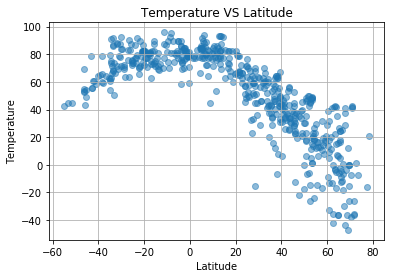

In [12]:
plt.scatter(df["Latitude"], df["Temperature"],alpha=0.5)
plt.title("Temperature VS Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.savefig("Temperature VS Latitude.png")

In [13]:
df.columns

Index(['Temperature', 'Humidity', 'Cloudiness', 'Wind_Speed', 'Latitude',
       'city'],
      dtype='object')

In [14]:
df["Humidity"]=df["Humidity"].clip(0,100)

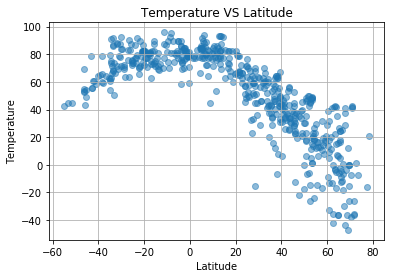

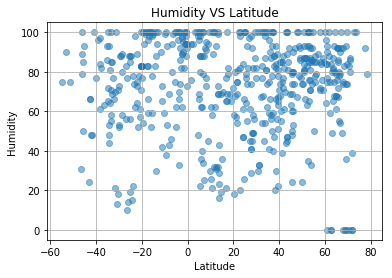

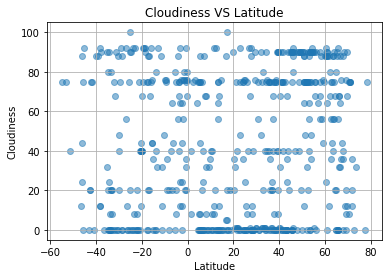

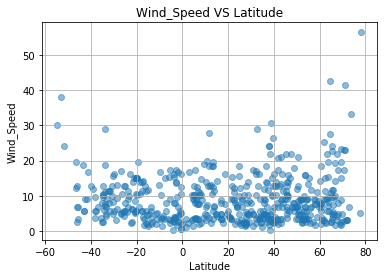

In [15]:
labels=["Temperature", "Humidity", "Cloudiness", "Wind_Speed"]
for label in labels:
    plt.scatter(df["Latitude"], df[label],alpha=0.5)
    plt.title(f"{label} VS Latitude")
    plt.xlabel("Latitude")
    plt.ylabel(label)
    plt.grid()
    plt.savefig(f"{label} VS Latitude.png")
    plt.show()    

In [16]:
def temperature_conversion(x):
    return (x-32)*5/9
temperature_conversion(32)
    
    

0.0

In [17]:
df["celcius"]= df["Temperature"].apply(temperature_conversion)
df.head()

,Temperature,Humidity,Cloudiness,Wind_Speed,Latitude,city,celcius
0,66.30,81,8,7.72,-34.00,kruisfontein,19.055556
1,47.00,93,88,9.95,53.19,banagher,8.333333
2,82.40,83,40,14.99,-20.01,grand gaube,28.000000
3,64.59,79,0,3.36,17.54,san quintin,18.105556
4,70.53,94,80,2.13,-0.23,payakumbuh,21.405556


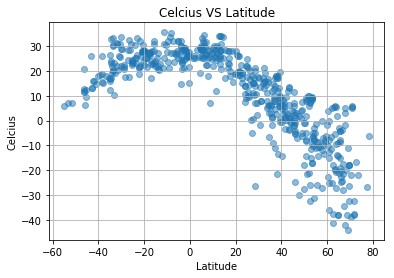

In [18]:
plt.scatter(df["Latitude"], df["celcius"],alpha=0.5)
plt.title("Celcius VS Latitude")
plt.xlabel("Latitude")
plt.ylabel("Celcius")
plt.grid()
plt.savefig("Temperature VS Latitude.png")